# Machine Learning Engineer Nanodegree
# Capstone
# Project: To find an Optimum Machine Learning Model for Human Activity        Recognition with Smartphone Sensor Data

This is the Capstone for MLND.
Our purpose is to recognize human activity based on the sensor data from smartphones and to find an optimum model with can predict these activities with high degree of accuracy.

In [1]:
# Import the Necessary Libraries

import time
import numpy as np
from numpy import array, argmax
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import display # Allows the use of display() for DataFrames
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Exploring the Data

In [2]:
# Import the Data set
train = pd.read_csv('./Data/train.csv')
test = pd.read_csv('./Data/test.csv')

# Merge the data into a single file as 'data'(later we will use train_test_split for splitting train and test set)
data = pd.concat([train, test])

# Success - Display the first record
display(data.head(n=1))

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.0304,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING





### Data Exporation: Explorng the Dataset

A preliminary exploration of the dataset will let us know how many Activities belong into each of the six catagories : 



We have 6 activities, 3 passive [SITTING, STANDING or LYING] and 3 active [WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS] which involve walking. So, each observation in the dataset represents one of the six activities whose features are recorded in the 561 variables. Our goal would be trian a machine to predict one of the six activities given a feature set of these 561 variables.

Let's check how the activities are distributed.


In [3]:
# Total number of records
n_records = data.shape[0]

# Number of records where individual is WALKING
n_walking = data[data['Activity']=='WALKING'].shape[0]

# Number of records where individual is WALKING_UPSTAIRS
n_walkingU = data[data['Activity']=='WALKING_UPSTAIRS'].shape[0]

# Number of records where individual is WALKING_DOWNSTAIRS
n_walkingD = data[data['Activity']=='WALKING_DOWNSTAIRS'].shape[0]

# Number of records where individual is SITTING
n_sitting = data[data['Activity']=='SITTING'].shape[0]

# Number of records where individual is STANDING
n_standing = data[data['Activity']=='STANDING'].shape[0]

# Number of records where individual is LAYING
n_laying = data[data['Activity']=='LAYING'].shape[0]


# Percentage of individuals doing each of the activities:
walking_percent = (n_walking*100)/(n_records * 1.0)
walkingU_percent = (n_walkingU*100)/(n_records * 1.0)
walkingD_percent = (n_walkingD*100)/(n_records * 1.0)
sitting_percent = (n_sitting*100)/(n_records * 1.0)
standing_percent = (n_standing*100)/(n_records * 1.0)
laying_percent = (n_laying*100)/(n_records * 1.0)


# Print the results
print "Total number of records: {}".format(n_records)
print "Total no of Individuals who are WALKING: {}".format(n_walking)
print "Total no of Individuals who are WALKING_UPSTAIRS: {}".format(n_walkingU)
print "Total no of Individuals who are WALKING_DOWNSTAIRS: {}".format(n_walkingD)
print "Total no of Individuals who are SITTING: {}".format(n_sitting)
print "Total no of Individuals who are STANDING: {}".format(n_standing)
print "Total no of Individuals who are LAYING: {}".format(n_laying)

print "Percentage of Individuals who are WALKING: {:.2f}%".format(walking_percent)
print "Percentage of Individuals who are WALKING_UPSTAIRS: {:.2f}%".format(walkingU_percent)
print "Percentage of Individuals who are WALKING_DOWNSTAIRS: {:.2f}%".format(walkingD_percent)
print "Percentage of Individuals who are SITTING: {:.2f}%".format(sitting_percent)
print "Percentage of Individuals who are STANDING: {:.2f}%".format(standing_percent)
print "Percentage of Individuals who are LAYING: {:.2f}%".format(laying_percent)

Total number of records: 10299
Total no of Individuals who are WALKING: 1722
Total no of Individuals who are WALKING_UPSTAIRS: 1544
Total no of Individuals who are WALKING_DOWNSTAIRS: 1406
Total no of Individuals who are SITTING: 1777
Total no of Individuals who are STANDING: 1906
Total no of Individuals who are LAYING: 1944
Percentage of Individuals who are WALKING: 16.72%
Percentage of Individuals who are WALKING_UPSTAIRS: 14.99%
Percentage of Individuals who are WALKING_DOWNSTAIRS: 13.65%
Percentage of Individuals who are SITTING: 17.25%
Percentage of Individuals who are STANDING: 18.51%
Percentage of Individuals who are LAYING: 18.88%


### Now Let's see how many observations are recorded by each subject. We have 30 Subjects.

In [4]:
display(pd.crosstab(data.subject, data.Activity))

Activity,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS
subject,,,,,,
1,50,47,53,95,49,53
2,48,46,54,59,47,48
3,62,52,61,58,49,59
4,54,50,56,60,45,52
5,52,44,56,56,47,47
6,57,55,57,57,48,51
7,52,48,53,57,47,51
8,54,46,54,48,38,41
9,50,50,45,52,42,49


From our crosabulation we can see that the data is almost evenly distributed for all the activities among all the subjects. 
Let's pick subject 10 and compare the activities with the first three variables - mean body acceleration in 3 spatial dimensions.


### Understading the Dataset Features with Visualization: 
 For our dataset we are using Seaborn Strip-Plot and Scatter plot to understand hw the fetures influence the activities.

References:
* _Strip-plot:   https://seaborn.pydata.org/generated/seaborn.stripplot.html?highlight=stripplot#seaborn.stripplot_

* _Scatter-Plot:  https://seaborn.pydata.org/generated/seaborn.clustermap.html?highlight=clustermap#seaborn.clustermap _

In [5]:
sub = data.loc[data['subject']==10]

In [6]:
sns.set_style('darkgrid')

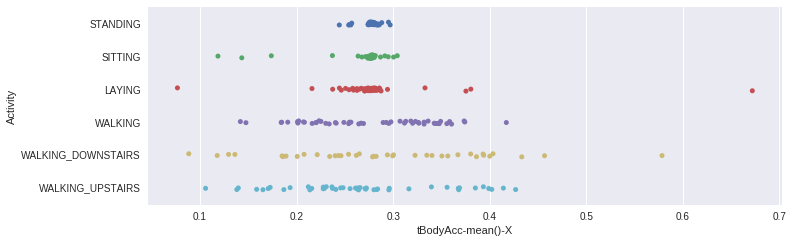

In [8]:
# Plot Mean Body Accleration in X direction against Activities.
fig = plt.figure(figsize=(25,8))
ax = fig.add_subplot(221)
ax = sns.stripplot(y = 'Activity', x =sub.iloc[:,0], data=sub, jitter=0.05)
plt.show()

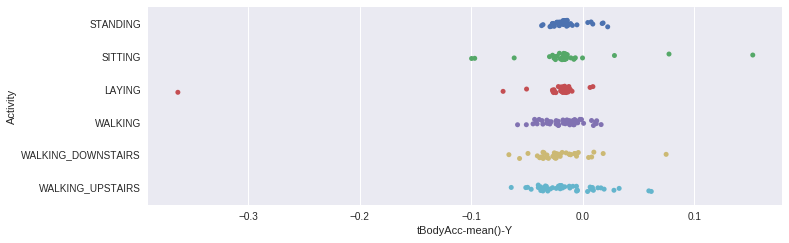

In [9]:
# Plot Mean Body Accleration in Y direction against Activities.
fig = plt.figure(figsize=(25,8))
ax = fig.add_subplot(222)
ax = sns.stripplot(y = 'Activity', x =sub.iloc[:,1], data=sub, jitter=True)
plt.show()

### Results:
From the above visualization we can see that the body acclertion in X direction is more variable than in Y diection. If we observe closely, for the active activities: WALKING, WALKING_UPSTAIRS and WALKING_DOWNSTAIRS the variation in X-axis more compared the passive activities: STANDING, SITTING and LAYING.



Now let us plot a dendrogram using seaborn to check if we can find any structure of Mean Body Acc in X Y Z direction with Actvities

/home/ankur/anaconda2/lib/python2.7/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


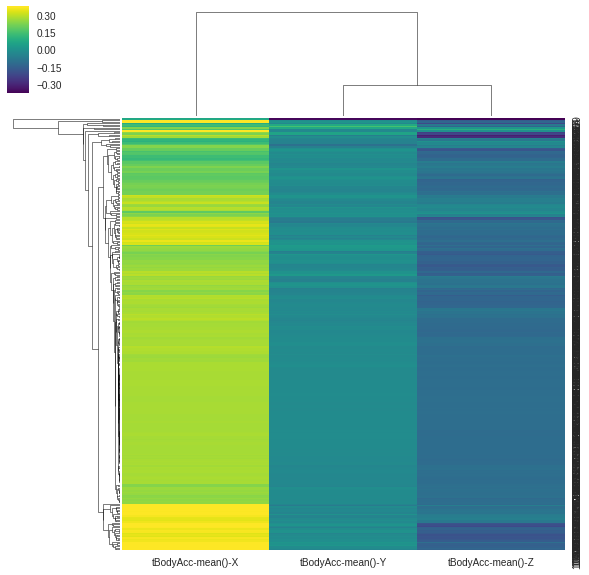

In [10]:
# Using seaborn lets plot a clustermap
plot_data = ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z']
sns.clustermap(data = sub[plot_data], cmap= "viridis", robust=True)

### Results:
In the above visualization we can see that most of the plot is homogeneous. In X and Z direction, only a few spots of the map are dark, Y being constatly homogenious all the time throughout. If we recall from our previous plot, for the active activities mean body acc in X has a high variation and the few dark spots here might be due to that. From our mean body acc plot we can not conclude anything strongly.

Lets take another feature to check if we can find any structure. This time lets consider MaxBodyAcc in X Y Z direction.

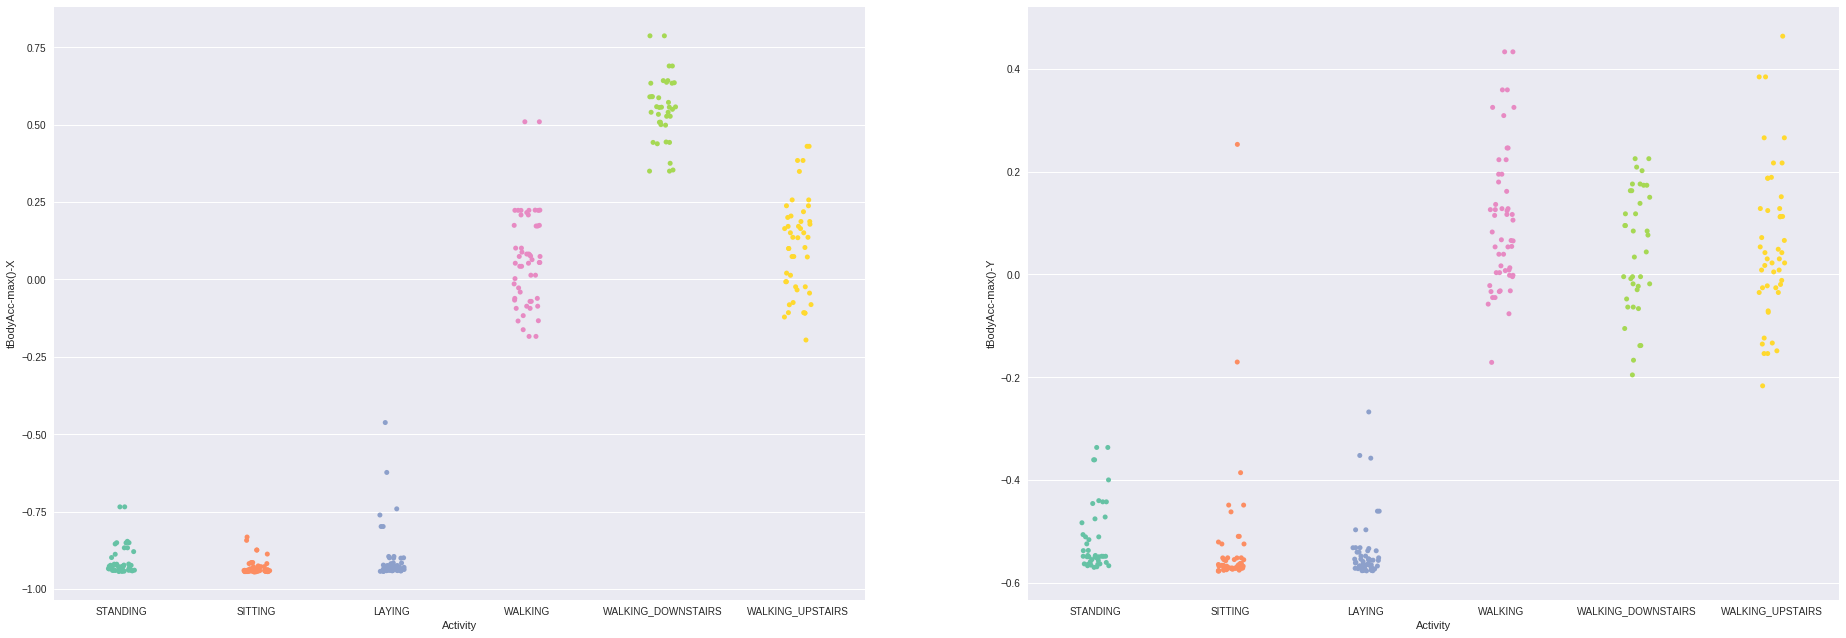

In [11]:
# Plot max accln

fig = plt.figure(figsize=(32,24))
ax_1 = fig.add_subplot(221)
ax_1 = sns.stripplot(x='Activity', y='tBodyAcc-max()-X', data=sub, jitter=True, palette="Set2")
ax_2 = fig.add_subplot(222)
ax_2 = sns.stripplot(x='Activity', y='tBodyAcc-max()-Y', data=sub, jitter=True, palette="Set2")
plt.show()

Comparing the above Strip-plot, we can clearly see that for Max Acc in both X and Y direction, the Passive activities are way below the active ones and for the active one the variation is also huge. Which makes sense, because accl in X and Y directions should be there when any actve activities are performed. If we notice in the first of the two plots, WALKING_DOWNSTAIRS has a greater value fo Max body accleration. This can be explained as when a person walks down stairs, his body moves comparatively faster compared to when he is steadily walking or Walking_upstairs.

Now, let's plot the cluster map for maximum body acceleration with Activities.

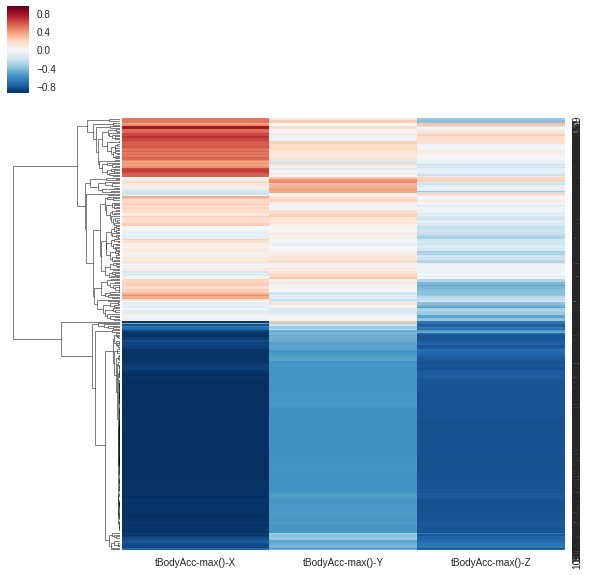

In [12]:
# Plot
sns.clustermap(sub[['tBodyAcc-max()-X', 'tBodyAcc-max()-Y', 'tBodyAcc-max()-Z']], col_cluster=False)

### Results:
From the above plot, we can now see the difference in the distribution between the active and passive activities with the walkdown activity clearly distinct from all others especially in the X-direction. The passive activities are indistinguishable and present no clear pattern in any direction (X, Y, Z). So we can say that Max Body Accleration in X direction has a direct influence on the Active Activities.

Finally, let us look how different activities are distributed using a barplot.

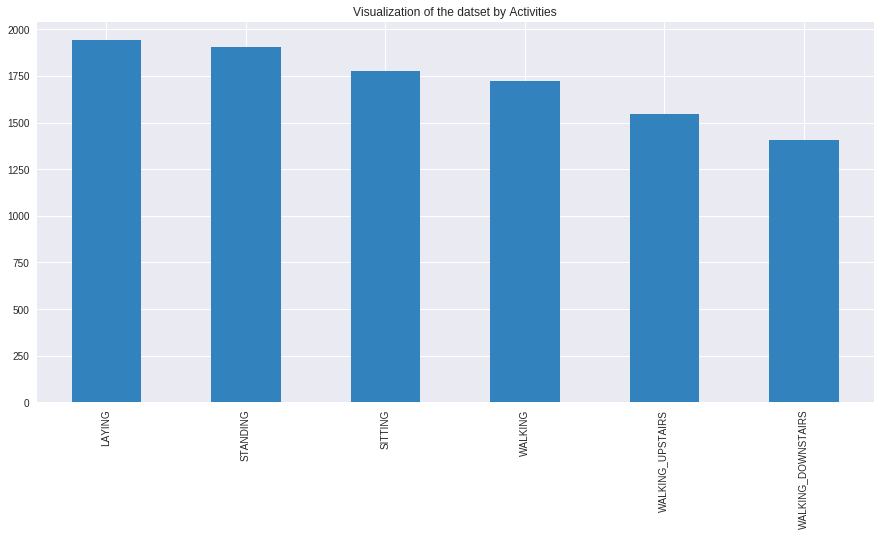

In [13]:
data['Activity'].value_counts().plot(kind='bar',figsize=(15,7), title='Visualization of the datset by Activities', colormap = 'tab20c')

We see from the above visualization that our dataset is evenly distributed among all the Activities. The disribution is quite balnced. This makes sense considering our dataset was collected from 30 individuals perfoming the same 6 Activities.

As we have completed analyzing a no of features let us look at the things we have learnt from this analysis:
* Our Dataest consists of 563 feature variables.
* The dataset is evenly distributed among all the activities .
* All data collected by all 30 subjects are evenly distributed against all 6 activities.
* Max Body Accleration in X-direction is greatly affected by the active activities (all three WALKING activties).
* The Passive activities are not affected by Max Body Accleration in any-directions.